<a href="https://colab.research.google.com/github/tsilverio/Desafio1_DataScience/blob/master/Desafio%202%20-%20Titanic_vers%C3%A3o_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando e preparando os dados

##Montando google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Importando bibliotecas

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE

from matplotlib.legend_handler import HandlerLine2D

#sobreviveu 0 = No, 1 = Yes
#grid search
#criar dummy para quem viaja sozinho
#colocar media de idade por homem sobrevivente e mulher sobrevivente
#agrupar cabines em ab cd efg

## Importando os arquivos

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/Titanic/train.csv")


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/Titanic/test.csv")


###Verificando o dataframe antes das transformações

In [0]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamanho_nome
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,16
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,32
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,25
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,16
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,44


In [0]:
train_data["Survived"] = train_data["Survived"].astype(float) ##quando não estava conseguindo a acurácia com decimal

In [0]:
train_data['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [0]:
train_data['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [0]:
train_data['Fare'].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [0]:
train_data.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [0]:
train_data.loc[[train_data['Cabin'] == 'A6'],['Cabin']]

In [0]:
train_data['Name'].str.contains("Miss")

In [0]:
train_data['Cabin'] = np.where(train_data["Cabin"].isnull(), 0, train_data['Cabin'])

In [0]:
train_data['Cabin'] = train_data['Cabin'].fillna(0)

In [0]:
train_data[train_data['Cabin'].str.contains("A", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamanho_nome
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,28
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000000,0,0,PC 17754,34.6542,A5,C,25
174,175,0,1,"Smith, Mr. James Clinch",male,56.000000,0,0,17764,30.6958,A7,C,23
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,29.699118,0,0,113767,50.0000,A32,S,21
209,210,1,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,A31,C,16
284,285,0,1,"Smith, Mr. Richard William",male,29.699118,0,0,113056,26.0000,A19,S,26
445,446,1,1,"Dodge, Master. Washington",male,4.000000,0,2,33638,81.8583,A34,S,25
475,476,0,1,"Clifford, Mr. George Quincy",male,29.699118,0,0,110465,52.0000,A14,S,27
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.000000,1,0,11755,39.6000,A16,C,65
583,584,0,1,"Ross, Mr. John Hugo",male,36.000000,0,0,13049,40.1250,A10,C,19


In [0]:
train_data[train_data['Name'].str.contains("A")]

In [0]:
train_data.info()

##Preenchendo valores nulos, criando e transformando variáveis

In [0]:
train_data['Pclass'] = train_data['Pclass'].apply(str)
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())

train_data['Age'] = np.where((train_data.Age.isna() & (train_data.Sex=='female') & (train_data.Survived==0)),train_data[(train_data.Sex=='female') & (train_data.Survived==0)][['Age']].mean(),train_data['Age'])
train_data['Age'] = np.where((train_data.Age.isna() & (train_data.Sex=='female') & (train_data.Survived==1)),train_data[(train_data.Sex=='female') & (train_data.Survived==1)][['Age']].mean(),train_data['Age'])
train_data['Age'] = np.where((train_data.Age.isna() & (train_data.Sex=='male') & (train_data.Survived==0)),train_data[(train_data.Sex=='male') & (train_data.Survived==0)][['Age']].mean(),train_data['Age'])
train_data['Age'] = np.where((train_data.Age.isna() & (train_data.Sex=='male') & (train_data.Survived==1)),train_data[(train_data.Sex=='male') & (train_data.Survived==1)][['Age']].mean(),train_data['Age'])

train_data['Criança'] = np.where(train_data['Age'] < 12,1,0).astype('object')
train_data['Adolescente'] = np.where((train_data['Age'] >= 12) & (train_data['Age'] < 20),1,0).astype('object')
train_data['Jovem'] = np.where((train_data['Age'] >= 20) & (train_data['Age'] < 35),1,0).astype('object')
train_data['Adulto'] = np.where((train_data['Age'] >= 35) & (train_data['Age'] < 65),1,0).astype('object')
train_data['Idosos'] = np.where((train_data['Age'] >= 65) & (train_data['Age'] < 120),1,0).astype('object')


train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Tamanho_nome'] = train_data['Name'].apply(len)
train_data['Cabin'] = train_data['Cabin'].fillna(0)

train_data['Sozinho'] = np.where((train_data.SibSp == 0) & (train_data.Parch == 0), 1,0).astype('object')

train_data['Cabin_A'] = np.where(train_data['Cabin'].str.contains("A", na=False),1,0).astype('object')
train_data['Cabin_B'] = np.where(train_data['Cabin'].str.contains("B", na=False),1,0).astype('object')
train_data['Cabin_C'] = np.where(train_data['Cabin'].str.contains("C", na=False),1,0).astype('object')
train_data['Cabin_D'] = np.where(train_data['Cabin'].str.contains("D", na=False),1,0).astype('object')
train_data['Cabin_E'] = np.where(train_data['Cabin'].str.contains("E", na=False),1,0).astype('object')
train_data['Cabin_F'] = np.where(train_data['Cabin'].str.contains("F", na=False),1,0).astype('object')
train_data['Cabin_G'] = np.where(train_data['Cabin'].str.contains("G", na=False),1,0).astype('object')

train_data['upper_cabins'] = np.where((train_data['Cabin'].str.contains('A', na=False) |train_data['Cabin'].str.contains('B', na=False)),1,0).astype('object')
train_data['middle_cabins'] = np.where((train_data['Cabin'].str.contains('C', na=False) |train_data['Cabin'].str.contains('D', na=False)),1,0).astype('object')
train_data['low_cabins'] = np.where((train_data['Cabin'].str.contains('E', na=False) | train_data['Cabin'].str.contains('F', na=False) |train_data['Cabin'].str.contains('G', na=False)),1,0).astype('object')

#=================================================================================================================

test_data['Pclass'] = test_data['Pclass'].apply(str)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

test_data['Age'] = np.where((test_data.Age.isna() & (test_data.Sex=='female')),test_data[(test_data.Sex=='female')][['Age']].mean(),test_data['Age'])
test_data['Age'] = np.where((test_data.Age.isna() & (test_data.Sex=='male')),test_data[(test_data.Sex=='male')][['Age']].mean(),test_data['Age'])

test_data['Criança'] = np.where(test_data['Age'] < 12,1,0).astype('object')
test_data['Adolescente'] = np.where((test_data['Age'] >= 12) & (test_data['Age'] < 20),1,0).astype('object')
test_data['Jovem'] = np.where((test_data['Age'] >= 20) & (test_data['Age'] < 35),1,0).astype('object')
test_data['Adulto'] = np.where((test_data['Age'] >= 35) & (test_data['Age'] < 65),1,0).astype('object')
test_data['Idosos'] = np.where((test_data['Age'] >= 65) & (test_data['Age'] < 120),1,0).astype('object')

test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Tamanho_nome'] = test_data['Name'].apply(len)
test_data['Cabin'] = test_data['Cabin'].fillna(0)

test_data['Sozinho'] = np.where((test_data.SibSp == 0) & (test_data.Parch == 0), 1,0).astype('object')

test_data['Cabin_A'] = np.where(test_data['Cabin'].str.contains("A", na=False),1,0).astype('object')
test_data['Cabin_B'] = np.where(test_data['Cabin'].str.contains("B", na=False),1,0).astype('object')
test_data['Cabin_C'] = np.where(test_data['Cabin'].str.contains("C", na=False),1,0).astype('object')
test_data['Cabin_D'] = np.where(test_data['Cabin'].str.contains("D", na=False),1,0).astype('object')
test_data['Cabin_E'] = np.where(test_data['Cabin'].str.contains("E", na=False),1,0).astype('object')
test_data['Cabin_F'] = np.where(test_data['Cabin'].str.contains("F", na=False),1,0).astype('object')
test_data['Cabin_G'] = np.where(test_data['Cabin'].str.contains("G", na=False),1,0).astype('object')

test_data['upper_cabins'] = np.where((test_data['Cabin'].str.contains('A', na=False) |test_data['Cabin'].str.contains('B', na=False)),1,0).astype('object')
test_data['middle_cabins'] = np.where((test_data['Cabin'].str.contains('C', na=False) |test_data['Cabin'].str.contains('D', na=False)),1,0).astype('object')
test_data['low_cabins'] = np.where((test_data['Cabin'].str.contains('E', na=False) | test_data['Cabin'].str.contains('F', na=False) |test_data['Cabin'].str.contains('G', na=False)),1,0).astype('object')



##Validando a idade

In [0]:
train_data['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [0]:
train_data[train_data.Age.isna() & (train_data.Sex=='male') & (train_data.Survived==1)].count()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Tamanho_nome    0
dtype: int64

In [0]:
train_data[(train_data.Age > 28) & (train_data.Age < 29)].count()

PassengerId     38
Survived        38
Pclass          38
Name            38
Sex             38
Age             38
SibSp           38
Parch           38
Ticket          38
Fare            38
Cabin           38
Embarked        38
Tamanho_nome    38
dtype: int64

In [0]:
train_data[(train_data.Age > 27) & (train_data.Age < 28)].count()

PassengerId     16
Survived        16
Pclass          16
Name            16
Sex             16
Age             16
SibSp           16
Parch           16
Ticket          16
Fare            16
Cabin           16
Embarked        16
Tamanho_nome    16
dtype: int64

In [0]:
train_data[(train_data.Age > 31) & (train_data.Age < 32)].count()

PassengerId     108
Survived        108
Pclass          108
Name            108
Sex             108
Age             108
SibSp           108
Parch           108
Ticket          108
Fare            108
Cabin           108
Embarked        108
Tamanho_nome    108
dtype: int64

In [0]:
train_data[(train_data.Age > 25) & (train_data.Age < 26)].count()

PassengerId     17
Survived        17
Pclass          17
Name            17
Sex             17
Age             17
SibSp           17
Parch           17
Ticket          17
Fare            17
Cabin           17
Embarked        17
Tamanho_nome    17
dtype: int64

In [0]:
train_data[(train_data.Sex=='male') & (train_data.Survived==0)][['Age']].mean()

Age    31.618056
dtype: float64

In [0]:
train_data[(train_data.Sex=='male') & (train_data.Survived==1)][['Age']].mean()

Age    27.276022
dtype: float64

In [0]:
train_data[(train_data.Sex=='female') & (train_data.Survived==0)][['Age']].mean()

Age    25.046875
dtype: float64

In [0]:
train_data[(train_data.Sex=='female') & (train_data.Survived==1)][['Age']].mean()

Age    28.847716
dtype: float64

##Verificando o dataframe depois das transformações

In [0]:
train_data.info()

In [0]:
train_data.head(10)

In [70]:
train_data['Cabin'].isnull().value_counts()

False    891
Name: Cabin, dtype: int64

## Setando as variáveis dummies

In [0]:
variaveis = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]

##Populando o X e o y de treino

In [0]:
y = train_data["Survived"]
X = pd.get_dummies(train_data[variaveis])

X['Fare'] = train_data['Fare']
X['Age'] = train_data['Age']

X['Criança'] = train_data['Criança']
X['Adolescente'] = train_data['Adolescente']
X['Jovem'] = train_data['Jovem']
X['Adulto'] = train_data['Adulto']
X['Idosos'] = train_data['Idosos']

X['Tamanho_nome'] = train_data['Tamanho_nome']
X['Sozinho'] = train_data['Sozinho']

X['Cabin_A'] = train_data['Cabin_A']
X['Cabin_B'] = train_data['Cabin_B']
X['Cabin_C'] = train_data['Cabin_C']
X['Cabin_D'] = train_data['Cabin_D']
X['Cabin_E'] = train_data['Cabin_E']
X['Cabin_F'] = train_data['Cabin_F']
X['Cabin_G'] = train_data['Cabin_G']

X['upper_cabins'] = train_data['upper_cabins']
X['middle_cabins'] = train_data['middle_cabins']
X['low_cabins'] = train_data['low_cabins']

###Validando o X

In [46]:
X.head(10)

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare,Age,Criança,Adolescente,Jovem,Adulto,Idosos,Tamanho_nome,Sozinho,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,upper_cabins,middle_cabins,low_cabins
0,1,0,0,0,1,0,1,0,0,1,7.2500,22.000000,0,0,1,0,0,23,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,0,0,71.2833,38.000000,0,0,0,1,0,51,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,1,0,0,0,1,7.9250,26.000000,0,0,1,0,0,22,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,1,53.1000,35.000000,0,0,0,1,0,44,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,1,8.0500,35.000000,0,0,0,1,0,24,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,1,0,8.4583,31.618056,0,0,1,0,0,16,1,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,1,0,0,1,51.8625,54.000000,0,0,0,1,0,23,1,0,0,0,0,1,0,0,0,0,1
7,3,1,0,0,1,0,1,0,0,1,21.0750,2.000000,1,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,1,1,0,0,0,1,11.1333,27.000000,0,0,1,0,0,49,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,1,0,1,0,0,30.0708,14.000000,0,1,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
SibSp         891 non-null int64
Parch         891 non-null int64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Fare          891 non-null float64
Age           891 non-null float64
Sozinho       891 non-null object
dtypes: float64(2), int64(2), object(1), uint8(8)
memory usage: 41.9+ KB


#Separando, treinando e validando o modelo com os dados de treino

## Separando o dataset de treino e validação com train_test_split

In [0]:
np.random.seed(0)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 0, test_size=0.25)

## Separando os dados com KFold

In [0]:
kf = KFold(5, shuffle=True, random_state=0)

In [0]:

resultados = []
for rep in range(10):
    #print("Rep:", rep)
    kf = KFold(5, shuffle=True, random_state=rep)
    
    for linhas_treino, linhas_valid in kf.split(X):
        #print("Treino:", linhas_treino.shape[0])
        #print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = LogisticRegression()
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        #print("Acc:", acc)
        #print()

In [63]:
np.mean(resultados)

0.8095518172117255

###Validando

In [0]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 21 columns):
SibSp           668 non-null int64
Parch           668 non-null int64
Pclass_1        668 non-null uint8
Pclass_2        668 non-null uint8
Pclass_3        668 non-null uint8
Sex_female      668 non-null uint8
Sex_male        668 non-null uint8
Embarked_C      668 non-null uint8
Embarked_Q      668 non-null uint8
Embarked_S      668 non-null uint8
Fare            668 non-null float64
Age             668 non-null float64
Tamanho_nome    668 non-null int64
Sozinho         668 non-null object
Cabin_A         668 non-null object
Cabin_B         668 non-null object
Cabin_C         668 non-null object
Cabin_D         668 non-null object
Cabin_E         668 non-null object
Cabin_F         668 non-null object
Cabin_G         668 non-null object
dtypes: float64(2), int64(3), object(8), uint8(8)
memory usage: 78.3+ KB


In [0]:
train_X.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare,Age,Tamanho_nome,Sozinho,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
105,0,0,0,0,1,0,1,0,0,1,7.8958,28.0,21,1,0,0,0,0,0,0,0
68,4,2,0,0,1,1,0,0,0,1,7.9250,17.0,31,0,0,0,0,0,0,0,0
253,1,0,0,0,1,0,1,0,0,1,16.1000,30.0,24,0,0,0,0,0,0,0,0
320,0,0,0,0,1,0,1,0,0,1,7.2500,22.0,18,1,0,0,0,0,0,0,0
706,0,0,0,1,0,1,0,0,0,1,13.5000,45.0,29,1,0,0,0,0,0,0,0


In [0]:
train_X.shape

(668, 20)

In [0]:
train_y.shape

(668,)

In [0]:
valid_X.shape

(223, 13)

In [0]:
valid_y.shape

(223,)

##Balanceando o dataset

Text(0, 0.5, 'Frequency')

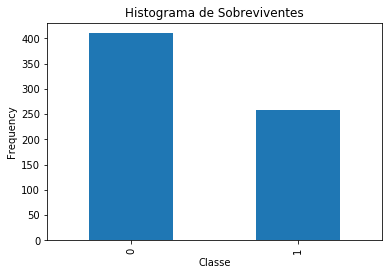

In [0]:
count_classes = pd.value_counts(train_y, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de Sobreviventes")
plt.xlabel("Classe")
plt.ylabel("Frequency")

In [0]:
sm = SMOTE(random_state=1234)

train_X_res, train_y_res = sm.fit_sample(train_X, train_y.ravel())

Text(0, 0.5, 'Frequency')

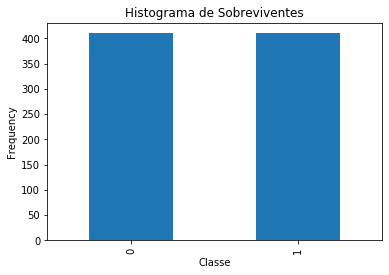

In [0]:
count_classes = pd.value_counts(train_y_res, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de Sobreviventes")
plt.xlabel("Classe")
plt.ylabel("Frequency")

##Rodando o modelo com dados de treino e prevendo com dados de validação

###Compara N_estimators

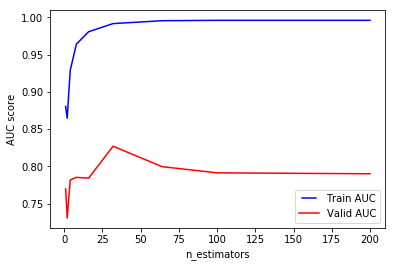

In [0]:
list_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
valid_results = []

for val_estimator in list_estimators:
  model = RandomForestClassifier(n_estimators=val_estimator, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_estimators, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

###Compara max_depth

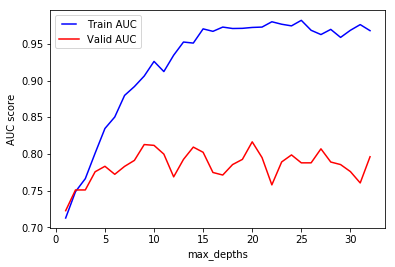

In [0]:
list_max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
valid_results = []

for val_max_depth in list_max_depths:
  model = RandomForestClassifier(max_depth=val_max_depth, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_max_depths, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

###Compara min_samples_split

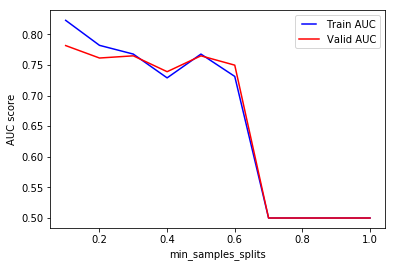

In [0]:
list_min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
valid_results = []

for val_min_samples_split in list_min_samples_splits:
  model = RandomForestClassifier(min_samples_split=val_min_samples_split, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_min_samples_splits, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

###min_samples_leaf

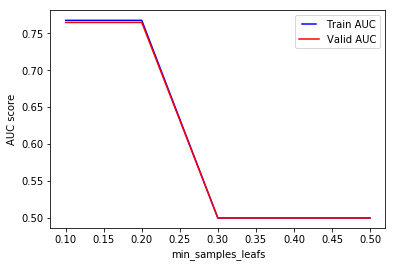

In [0]:
list_min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
valid_results = []

for val_min_samples_leaf in list_min_samples_leafs:
  model = RandomForestClassifier(min_samples_leaf=val_min_samples_leaf, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_min_samples_leafs, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

###max_features

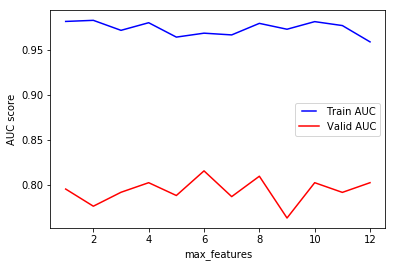

In [0]:
list_max_features = list(range(1,train_data.shape[1]))
train_results = []
valid_results = []

for val_max_feature in list_max_features:
  model = RandomForestClassifier(max_features=val_max_feature, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_max_features, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

##Prevendo o modelo com dados de treino

###Rodando com os valores default

In [0]:
#model = RandomForestClassifier(max_depth=10)
model = RandomForestClassifier()
model.fit(train_X, train_y)
predictions = model.predict(valid_X)

np.mean(valid_y == predictions)

0.8430493273542601

### Rodando com valores corrigidos

In [0]:
model = RandomForestClassifier(n_estimators=32, max_depth=20, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 6)
model.fit(train_X, train_y)
predictions = model.predict(valid_X)

np.mean(valid_y == predictions)

0.7892376681614349

##Montando a matriz de confusão

In [0]:
def CMatrix(CM,labels =['Não Sobrevivente','Sobrevivente']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [0]:
#y_pred_test_log = logistic_regression.predict(valid_X) 
model = RandomForestClassifier(max_depth=10)
model.fit(train_X, train_y)
y_pred_test_log = model.predict(valid_X) 

acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=valid_y)
precisao_log = precision_score(y_pred=y_pred_test_log,y_true=valid_y)
recall_log = recall_score(y_pred=y_pred_test_log,y_true=valid_y)

CM= confusion_matrix(y_pred=y_pred_test_log,y_true=valid_y)
CMatrix(CM)

###Exportanto os resultados para validar

In [0]:
#sobreviveu 0 = No, 1 = Yes

Prev = pd.Series(y_pred_test_log)
Prev.to_excel("Previsão.xlsx", header=False)
Real = pd.Series(valid_y)
Real.to_excel("Real.xlsx", header=False)

#Treinando com a base de treino inteira e prevendo com a base de teste

## Populando o X de teste

In [0]:
X_test = pd.get_dummies(test_data[variaveis])

X_test['Fare'] = test_data['Fare']
X_test['Age'] = test_data['Age']

X_test['Criança'] = test_data['Criança']
X_test['Adolescente'] = test_data['Adolescente']
X_test['Jovem'] = test_data['Jovem']
X_test['Adulto'] = test_data['Adulto']
X_test['Idosos'] = test_data['Idosos']

X_test['Tamanho_nome'] = test_data['Tamanho_nome']
X_test['Sozinho'] = test_data['Sozinho']

X_test['Cabin_A'] = test_data['Cabin_A']
X_test['Cabin_B'] = test_data['Cabin_B']
X_test['Cabin_C'] = test_data['Cabin_C']
X_test['Cabin_D'] = test_data['Cabin_D']
X_test['Cabin_E'] = test_data['Cabin_E']
X_test['Cabin_F'] = test_data['Cabin_F']
X_test['Cabin_G'] = test_data['Cabin_G']

X_test['upper_cabins'] = test_data['upper_cabins']
X_test['middle_cabins'] = test_data['middle_cabins']
X_test['low_cabins'] = test_data['low_cabins']

## Rodando com a base train inteira, valores corrigidos e prevendo com a base de teste

In [0]:
#model = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 6)
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X_test)



## Criar submission

In [0]:
sub = pd.Series(predictions, index=test_data['PassengerId'], name='Survived')
sub.to_csv("Nova submissão.csv", header=True)

In [0]:
!head -n10 "Nova submissão.csv"

head: cannot open 'Sub RandomForest.csv' for reading: No such file or directory
